In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [1]:
from IPython.display import display, Math, Latex
from __future__ import print_function
from __future__ import division

# Non-Linear Signal Processing: Exercise 2

This exercise is based on C.M. Bishop: *Pattern Recognition
and Machine Learning*, sections 1.4, 2.3.0-2.3.4 and appendix C.
The objective of the exercise is to become familiar with the 2D
normal distribution, the notion of covariance,  and using
projections on eigenvectors as features.

Print and comment on the figures produced by the cells below as outlined at the four **Checkpoints**.

## Multivariate Normal distribution

Let $\bf x$ be a $d$-dimensional variable, i.e. $\mathbf{x} =
(x_1,x_2,\ldots,x_d)^T$.  The probability of the variable $\bf x$ lying in a
region, $\cal A$, which is a subspace of ${\bf R}^d$ is given by
\begin{equation}
p(\bf x \in \cal A) = \int_{\cal A} p(\mathbf{x}) d \mathbf{x},
\end{equation}
where $p(\mathbf{x})$ is the probability density function of the variable \x.

In one dimension, the normal probability density function  is given by
\begin{equation}
\mathcal{N}(x|\mu, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}}\exp \left( -\frac{(x-\mu)^2}{2\sigma^2}\right),
\end{equation}
where $\mu$ and $\sigma^2$ are the mean and variance respectively. In
$d$ dimensions, the general multivariate normal probability density
function is given by
\begin{equation}
\mathcal{N}(\mathbf x|\mathbf m, \mathbf \Sigma) = \frac{1}{\sqrt{(2\pi)^d |\mathbf \Sigma|}}\exp \left(
  -\frac{1}{2}(\mathbf x-\mathbf m)^T \mathbf \Sigma^{-1} (\mathbf x-\mathbf m)  \right),
\end{equation}
where $\mathbf m$ is a $d$-dimensional vector, and $\mathbf \Sigma$ is a $d\times
d$ covariance matrix.

## 2D Normal distribution

Let $\mathbf x$ be a 2-dimensional variable, so that $d=2$ in the above
equations. Let $\mathbf x$ be a set of $N$ samples from \mathbf x, so that $\mathbf x =
\{\mathbf x_1, \mathbf x_2, \ldots ,\mathbf x_N\}$, where $\mathbf x_i = (x_{i,1}, x_{i,2})^T$,
$i=1,\ldots ,N$.

It is then possible to construct a 2D histogram of the data-set, $\mathbf x$,
by defining a Cartesian grid of small areas $\cal A_{j,k}$, where $j=1,\ldots,
M_1$ and $k=1,\ldots, M_2$. The histogram
is then given by
\begin{equation}
n_{j,k} =  \sum_{\mathbf x_i \in \cal A_{j,k}} 1 \,, \;\; j=1,\ldots,
M_1,\,k=1,\ldots, M_2,
\end{equation}

with $n_{j,k}$ denoting the number of observations of $\mathbf x_i$ falling in the region $\cal A_{j,k}$.
The normalized histogram is given by

\begin{equation}
\tilde{n}_{j,k} = \frac{n_{j,k}}{\sum_{j',k'} n_{{j',k'}}}.
\end{equation}

If the union of all the areas $\cal A_{j,k}$ includes all the samples in
$\mathbf x$, the equation above simplifies to
\begin{equation}
\tilde{n}_{j,k} = \frac{n_{j,k}}{N}.
\end{equation}

The normalized histogram can be compared with the histogram approximation
to the probability density function
\begin{equation}
P_{j,k} =  \int_{\cal A_{j,k}} p(\mathbf x) d\mathbf x \,, \;\; j=1,\ldots,
M_1,\,k=1,\ldots, M_2.
\end{equation}
Alternatively the histogram can be converted to a normalized probability density, simply by dividing the normalized histogram bins with their corresponding areas $\cal A_{j,k}$
\begin{equation}
p_{j,k} =  \frac{\tilde n_{j,k}}{\cal A_{j,k}}.
\end{equation}
Hereby, we obtain a model for the density that is constant over the area $\cal A_{j,k}$ of each bin.

### Checkpoint 2.1
Use the cells below to illustrate a 2-dimensional normal
probability density function given by a mean, $\mathbf m$, and covariance
matrix, $\mathbf \Sigma$.

Discuss the quality of the histogram as you vary the number of samples, $N$, from small
 to large values.
Compare your findings with the results from exercise 1 for the 1D
normal distribution and relate this to the curse of dimensionality.

In [2]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
% matplotlib inline
plt.rcParams['figure.figsize'] = (20,8)

In [3]:
multivariate_gaussian_pdf = lambda x, mu, sigma: \
np.exp(-.5*((x-mu[:,None]).T*np.dot((x-mu[:,None]).T,np.linalg.inv(sigma))).sum(1)) \
/((2*np.pi)**x.shape[0]*np.linalg.det(sigma))**.5
# because of broadcasting, if you want the density at just one 2d point, 
# do something like this: multivariate_gaussian_pdf(mu[:,None],mu,Sigma)

In [4]:
mu = np.array((5,2))
Sigma = np.array([1, 1.7, 1.7, 5]).reshape(2,2)

### number of samples, N

# N = 10**3
N = 10**4
# N = 10**5

D = np.random.multivariate_normal(mu, Sigma, N)
D = D.T

print('Estimated mean is:\n',D.mean(1))
print('\nEstimated covariance matrix is:\n',np.cov(D))

Estimated mean is:
 [ 5.0117411   2.01250566]

Estimated covariance matrix is:
 [[ 0.98580561  1.67263312]
 [ 1.67263312  4.95262017]]


In [5]:
nbins = 20
# nbins = 50
z,x,y = np.histogram2d(*D, bins=nbins,normed=1)
bar_length,bar_width = (np.diff(x)[0],np.diff(y)[0])
#z /= bar_length*bar_width

In [6]:
z.max()

0.1129600270744414

In [7]:
bar_cross_section_area = bar_length*bar_width
bar_volumes = bar_cross_section_area*z # z = bar_height

In [8]:
bar_volumes.shape,bar_volumes.sum()

((20, 20), 0.99999999999999978)

In [9]:
resol = 100 # points in smooth density plot
x1 = np.linspace(x[0],x[-1],resol)
x2 = np.linspace(y[0],y[-1],resol)
X = np.meshgrid(x1,x2)
X = np.array(X).reshape(2,-1)

In [10]:
p = multivariate_gaussian_pdf(X,mu, Sigma)

In [11]:
X = X.reshape(2,resol,resol);
p = p.reshape(resol,resol);

In [12]:
x_bar,y_bar = np.meshgrid(x[:-1],y[:-1])

In [13]:
bar_floor_dims = np.diff(x1)[0],np.diff(x2)[0]

In [14]:
p.shape, (p*np.prod(bar_floor_dims)).sum()

((100, 100), 0.99926929520527852)

CPU times: user 984 ms, sys: 432 ms, total: 1.42 s
Wall time: 936 ms


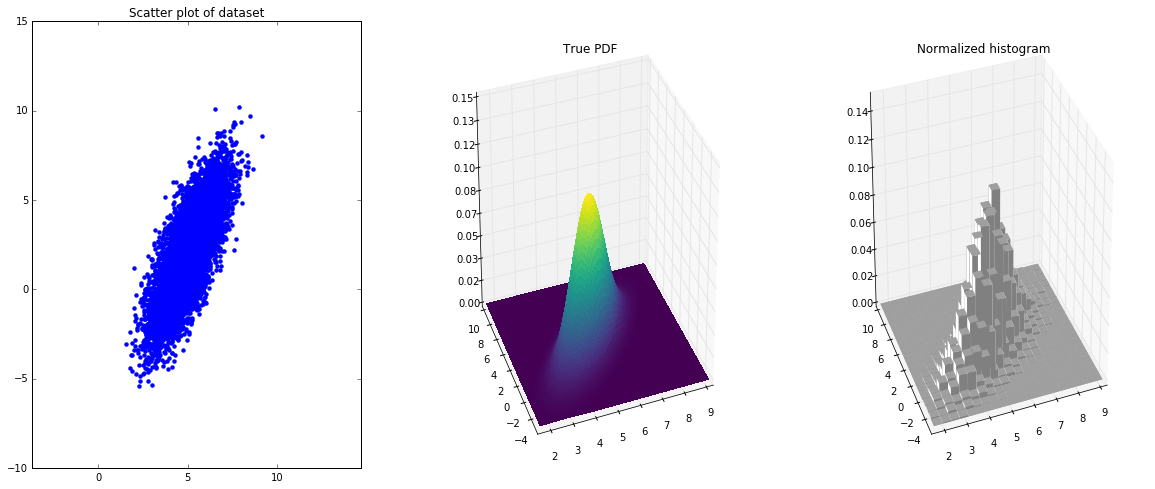

In [15]:
%%time
fig = plt.figure()
fig.add_subplot(131)
plt.scatter(*D,linewidths=0,alpha=1) # alpha is the transparency of the dots
plt.axis('equal')
plt.title('Scatter plot of dataset')

ax = fig.add_subplot(132, projection='3d')
ax.plot_surface(*X,p,rstride=1,cstride=1,cmap=cm.viridis,shade=1,linewidth=0, antialiased=False)
ax.view_init(elev=30, azim=-20-90)
ax.set_zlim(0,0.15)
plt.axis('tight')
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.title('True PDF')

ax = fig.add_subplot(133, projection='3d')
ax.bar3d(x_bar.flatten(),y_bar.flatten(),np.zeros(z.shape[0]**2),bar_length,bar_width,z.flatten(),color='#ffffff',linewidth=0)
ax.view_init(elev=30, azim=-20-90)
plt.axis('tight')
ax.set_zlim(0,0.15)
plt.title('Normalized histogram');

## Interpretation of covariance

A one-dimensional normal distribution is given by its mean, $\mu$, and
its variance, $\sigma^2$. The variance describes the variation of
the variable around its mean.

In two dimensions, each sample consists of two components. Each
dimension has a mean and a variance just as in the one-dimensional
case. Consider a sample, $\mathbf x=(x_1,x_2)^T$ from a 2D normal
distribution with mean $\mathbf m = (\mu_1, \mu_2)$. If the variance of
$x_1$, namely $\sigma_1^2$ is large, an individual sample of $x_1$
may well be quite different from $\mu_1$, and similarly for $x_2$.
However, there may be a trend that whenever $x_1$ is larger than
$\mu_1$, $x_2$ is also larger than $\mu_2$, and that whenever
$x_1$ is smaller than $\mu_1$, $x_2$ is also smaller than $\mu_2$.
In such a case, $x_1$ and $x_2$ are not independent, and they are
said to be correlated.

Another term is therefore needed to fully describe the variance of the
variable, $\mathbf x$, namely the covariance between its components,
${\rm{cov}} \left[x_1,x_2 \right] \equiv {\mathbb E}[(x_1 -\mu_1)(x_2-\mu_2)]$. The covariance matrix of \x\ is then given by
\begin{equation}
  \S = \left(
    \begin{array}{cc}
      \sigma_1^2 & {\rm{cov}} \left[x_1,x_2 \right]\\
      {\rm{cov}} \left[x_2,x_1 \right] & \sigma_2^2
    \end{array}
\right) \equiv \left(
    \begin{array}{cc}
      \sigma_{11} & \sigma_{12}\\
      \sigma_{21} & \sigma_{22}
    \end{array}
  \right).
\end{equation}
The terms $\sigma_{12}$ and $\sigma_{21}$ are equal since they
describe the covariance between the same components. The covariance
matrix is therefore always symmetric. The magnitude of the covariance
term for a given correlation between the two components also depends on
the diagonal variance terms. A useful quantity describing
the correlation between the components is the correlation coefficient,
$\rho$. It is the normalized covariance and is given by
\begin{equation}
  \rho = \frac{{\rm{cov}} \left[x_1,x_2 \right]}{\sqrt{\sigma_{1}^2\sigma_{2}^2}} = \frac{\sigma_{12}}{\sqrt{\sigma_{11}\sigma_{22}}}\,.
\end{equation}
where $\rho \in [-1,1]$. However, the limiting case $\rho=\pm1$ corresponds to a
perfect linear relationship between $x_1$ and $x_2$. In this case the
variable, \x, is not really 2-dimensional since one component
completely defines the other.

### Checkpoint 2.2
Use the cells below to visualize the probability density
functions of 2D normal distributions with different covariance
matrices. For example, try to fix the variances,
$\sigma_1^2$ and $\sigma_2^2$, while only changing the covariance.
Think of an example where there is no correlation between the
components and implement this distribution.  Comment on the dependence
of the orientation and shape of the ellipsoids in the contour plots of
quadratic form induced by the covariance matrix.

In [17]:
standard_gaussian_density = lambda x: np.exp(-.5*x**2)/np.sqrt(2*np.pi)
gaussian_density = lambda x,mu,sigma2: standard_gaussian_density((x-mu)/np.sqrt(sigma2))/np.sqrt(sigma2)

In [143]:
mu = np.array((5,20))
Sigma = np.array([2, 2.5, 2.5, 5]).reshape(2,2)

### number of samples, N

# N = 10**3
N = 10**4
# N = 10**5

D = np.random.multivariate_normal(mu, Sigma, N)
D = D.T

mu_ = D.mean(1)
Sigma_ = np.cov(D)
print('Estimated mean is:\n',mu_)
print('\nEstimated covariance matrix is:\n',Sigma_)

Estimated mean is:
 [  5.01200179  20.02343413]

Estimated covariance matrix is:
 [[ 1.99929755  2.51738775]
 [ 2.51738775  5.08494638]]


In [144]:
nbins = 50
z,x_hist,y_hist = np.histogram2d(*D, bins=nbins,normed=1)
bar_length,bar_width = (np.diff(x_hist)[0],np.diff(y_hist)[0])

# calculate mid-points of bars
x_hist = np.convolve(x_hist, np.ones(2,)/2, 'valid')
y_hist = np.convolve(y_hist, np.ones(2,)/2, 'valid')

In [145]:
# histograms and marginal pdfs
resol = 100

x_density = np.linspace(x_hist[0],x_hist[-1],resol)
y_density = np.linspace(y_hist[0],y_hist[-1],resol)

p1 = gaussian_density(x_density,mu_[0],D[0,:].var())
p2 = gaussian_density(y_density,mu_[1],D[1,:].var())

z_1 = z.sum(0)
z_1 /= z_1.sum()
z_1 /= (x_hist.max()-x_hist.min())/(nbins-1)

z_2 = z.sum(1)
z_2 /= z_2.sum()
z_2 /= (y_hist.max()-y_hist.min())/(nbins-1)

In [146]:
X_hist,Y_hist = np.meshgrid(x_hist,y_hist)
X_density,Y_density = np.meshgrid(x_density,y_density)

In [147]:
p = multivariate_gaussian_pdf(np.c_[X_density.flatten(),Y_density.flatten()].T,mu,Sigma).reshape(resol,resol)

In [148]:
# eigenvalues and eigenvectors of sample covariance matrix
lamda, U = np.linalg.eig(np.cov(D))

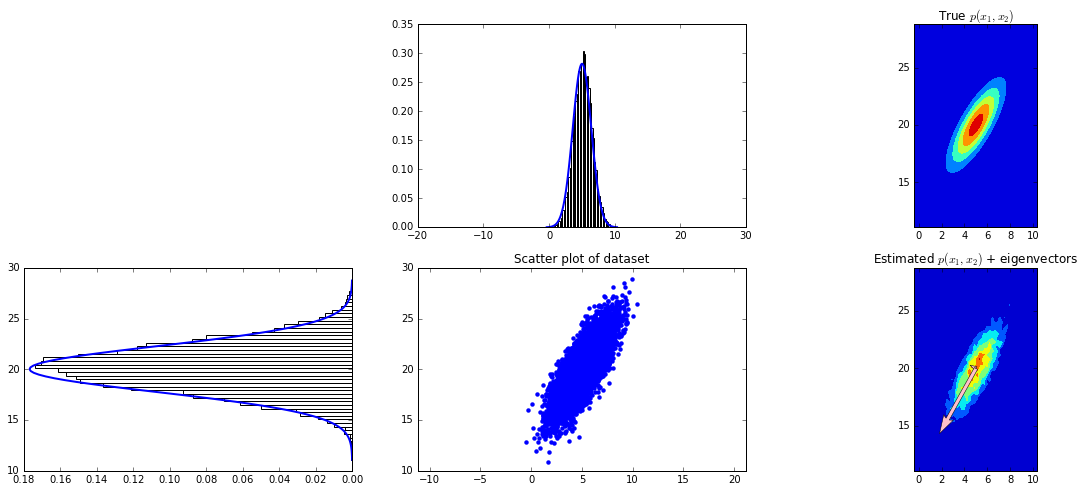

In [149]:
#%%time
fig = plt.figure()

fig.add_subplot(235)
plt.scatter(*D,linewidths=0,alpha=1) # alpha is the transparency of the dots
plt.axis('equal')
plt.ylim(10,30)
plt.title('Scatter plot of dataset')

fig.add_subplot(232)
plt.bar(x_hist,z_1,bar_length,color='white')
plt.plot(x_density,p1,linewidth=2)
plt.xlim(-20,30)

ax = fig.add_subplot(234)
ax.invert_xaxis()
plt.plot(p2,y_density,linewidth=2)
plt.ylim(10,30)
plt.barh(y_hist,z_2,bar_width,color='white')

ax = fig.add_subplot(236)
plt.contourf(X_hist,Y_hist,z);
scaled_eigenvectors = np.c_[np.c_[mu,mu].T,np.c_[U[:,0]*lamda[0],U[:,1]*lamda[1]].T]
ax.quiver(*zip(*scaled_eigenvectors),color='pink',angles='uv',scale_units='xy',scale=1, width=.03, linewidth=.5)

plt.axis('image')
plt.title('Estimated $p(x_1,x_2)$ + eigenvectors');

ax = fig.add_subplot(233)
plt.contourf(X_density,Y_density,p)
plt.axis('image')
plt.title('True $p(x_1,x_2)$');
#scaled_eigenvectors = np.array([[5,20,3,3],[5,20,3,-3]])
#ax.quiver(*zip(*scaled_eigenvectors),color='pink',angles='xy',scale_units='xy',scale=1, width=.03, linewidth=.5)

## Coordinate Transformation
For some non-linear signal detection algorithms
it is desired that the input should have zero mean, unit variance and
zero covariance. The advantage of this is that it is possible to use
the same algorithm (and not changing the control parameters of it)
 for variables of very different origins and covariation.

Geometrically, such a normalization corresponds to a coordinate
transformation to the system defined by the eigenvectors of
the covariance matrix. Typically, the mean and covariance matrix are
not known, and must therefore be estimated from the data-set, $\mathcal D =
\{\mathbf x_1, \mathbf x_2, \ldots ,\mathbf x_N\}$:
\begin{eqnarray}
  \hat{\mathbf x} & = & \frac{1}{N}\sum_{i=1}^N \mathbf x_i\\
  \hat{\Sigma} & = & \frac{1}{N-1}\sum_{i=1}^N
  (\mathbf x_i-\widehat{\mathbf x})(\mathbf x_i-\widehat{\mathbf x})^T\, .
\end{eqnarray}
The eigenvalue equation for the covariance matrix is
\begin{equation}
 \widehat{\Sigma}\mathbf u_j = \lambda_j\mathbf u_j\,,\;\; j=1,\ldots,d\,,
\end{equation}

where $\lambda_j$ is the $j$'th eigenvalue and $\mathbf u_j$ is the
corresponding eigenvector of $\widehat{\S}$. The transformed input variables are
then given by

\begin{equation}
  \tilde{\mathbf x}_i = \mathbf \Lambda^{-1/2}\mathbf U^T(\mathbf x_i-\hat{\mathbf x}),
\end{equation}
where
\begin{eqnarray}
  \mathbf U &=& (\mathbf u_1,\ldots, \mathbf u_d)\\
  \mathbf \Lambda &=& \text{diag}\left(\lambda_1, \ldots, \lambda_d \right).
\end{eqnarray}
It can be shown that the transformed data-set, $\tilde{\mathbf D} =
\{\tilde{\mathbf x}_1, \tilde{\mathbf x}_2, \ldots ,\tilde{\mathbf x}_N\}$ has zero mean
and a covariance matrix given by the unit matrix.

### Checkpoint 2.3
Use the cells below to calculate the eigenvalues and
eigenvectors of the covariance matrix for different
distributions. Comment on the geometrical significance of the
eigenvalues and eigenvectors. Compare the transformed data-sets from
different distributions. What happens if the term $\Lambda^{-1/2}$ is
removed from the equation it occurs in above?

In [150]:
mu = np.array((5,2))
Sigma = np.array([2, -1.2, -1.2, 3]).reshape(2,2)

### number of samples, N
N = 10**4

D = np.random.multivariate_normal(mu, Sigma, N)
D = D.T

mu_hat = D.mean(1)
Sigma_hat = np.cov(D)
print('Estimated mean is:\n',mu_)
print('\nEstimated covariance matrix is:\n',Sigma_)

Estimated mean is:
 [  5.01200179  20.02343413]

Estimated covariance matrix is:
 [[ 1.99929755  2.51738775]
 [ 2.51738775  5.08494638]]


In [151]:
lamda, U = np.linalg.eig(Sigma_hat)

In [152]:
D_ = np.dot(U.T,D-mu_hat[:,None])
mu_ = D_.mean(1)
Sigma_ = np.cov(D_)
Sigma_[np.abs(Sigma_) < 100*10**-16] = 0 # correction for rounding errors
lamda_, U_ = np.linalg.eig(Sigma_)

In [153]:
print('Estimated mean after transformation is:\n',mu_)
print('\nEstimated covariance matrix after transformation is:\n',Sigma_)

Estimated mean after transformation is:
 [ -8.83915163e-15   1.32057920e-14]

Estimated covariance matrix after transformation is:
 [[ 1.20353925  0.        ]
 [ 0.          3.80162185]]


In [154]:
nbins = 20

# histogram
z,x_hist,y_hist = np.histogram2d(*D, bins=nbins,normed=1)
bar_length,bar_width = (np.diff(x_hist)[0],np.diff(y_hist)[0])

# histogram after transformation
z_,x_hist_,y_hist_ = np.histogram2d(*D_, bins=nbins,normed=1)
bar_length_,bar_width_ = (np.diff(x_hist_)[0],np.diff(y_hist_)[0])

# calculate mid-points of bars
x_hist = np.convolve(x_hist, np.ones(2,)/2, 'valid')
y_hist = np.convolve(y_hist, np.ones(2,)/2, 'valid')
x_hist_ = np.convolve(x_hist_, np.ones(2,)/2, 'valid')
y_hist_ = np.convolve(y_hist_, np.ones(2,)/2, 'valid')

In [155]:
X_hist,Y_hist = np.meshgrid(x_hist,y_hist)
X_hist_,Y_hist_ = np.meshgrid(x_hist_,y_hist_)

In [156]:
resol = 100

x_density = np.linspace(x_hist[0],x_hist[-1],resol)
y_density = np.linspace(y_hist[0],y_hist[-1],resol)
X = np.meshgrid(x_density,y_density)
X = np.array(X).reshape(2,-1)

p = multivariate_gaussian_pdf(X,mu,Sigma)
X = X.reshape(2,resol,resol);
p = p.reshape(resol,resol)

x_density_ = np.linspace(x_hist_[0],x_hist_[-1],resol)
y_density_ = np.linspace(y_hist_[0],y_hist_[-1],resol)
X_ = np.meshgrid(x_density_,y_density_)
X_ = np.array(X_).reshape(2,-1)

p_ = multivariate_gaussian_pdf(X_,np.zeros(2,),np.eye(2))
X_ = X_.reshape(2,resol,resol);
p_ = p_.reshape(resol,resol);

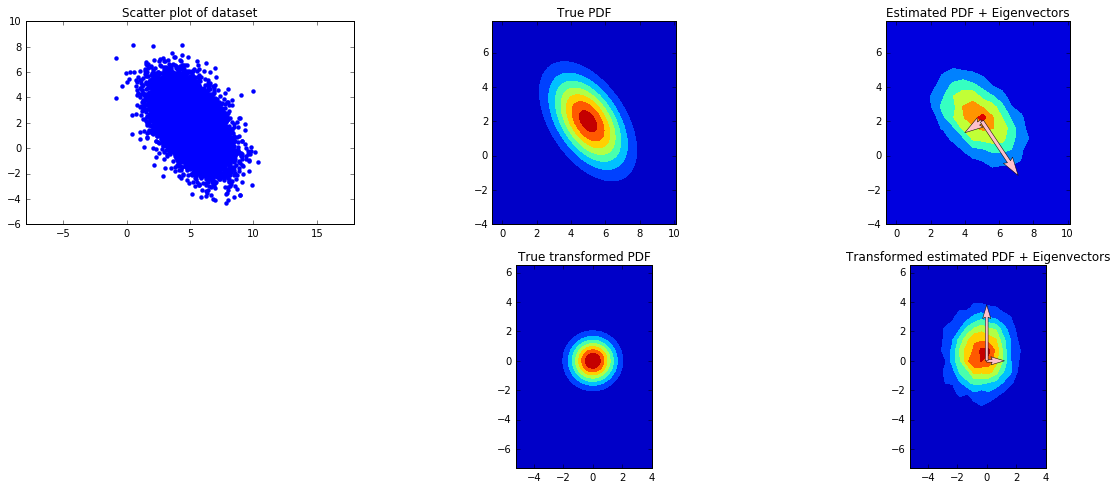

In [159]:
#%%time
fig = plt.figure()

fig.add_subplot(231)
plt.scatter(*D,linewidths=0,alpha=1) # alpha is the transparency of the dots
plt.axis('equal')
plt.title('Scatter plot of dataset')

fig.add_subplot(232)
plt.contourf(*X,p)
plt.axis('image')
plt.title('True PDF');

ax = fig.add_subplot(233)
plt.contourf(X_hist,Y_hist,z)
plt.axis('image')
plt.title('Estimated PDF + Eigenvectors');
scaled_eigenvectors = np.c_[np.c_[mu,mu].T,np.c_[U[:,0]*lamda[0],U[:,1]*lamda[1]].T]
ax.quiver(*zip(*scaled_eigenvectors),color='pink',angles='uv',scale_units='xy',scale=1, width=.02, linewidth=.5);

fig.add_subplot(235)
plt.contourf(*X_,p_)
plt.axis('image')
plt.title('True transformed PDF');

ax = fig.add_subplot(236)
plt.contourf(X_hist_,Y_hist_,z_)
plt.axis('image')
plt.title('Transformed estimated PDF + Eigenvectors');
scaled_eigenvectors_ = np.c_[np.c_[mu_,mu_].T,np.c_[U_[:,0]*lamda_[0],U_[:,1]*lamda_[1]].T]
ax.quiver(*zip(*scaled_eigenvectors_),color='pink',angles='uv',scale_units='xy',scale=1, width=.02, linewidth=.5);

## Projection on Eigenvectors
In some cases, the measured data is of a lower ``true'' dimension than
the apparent dimension of the data vector. For example, imagine a data-set of a
3-dimensional variable. If all the data are on a straight line, the
true dimension of the data is only 1D. If the data-set is
transformed to a coordinate system, where the variation of
the data is along one of the axes, the two other components can be
ignored.

Let $\lambda_1, \ldots, \lambda_d$ be the ordered set of eigenvalues
of the covariance matrix, such that $\lambda_1 \ge \lambda_2 \ge \ldots
\ge \lambda_d$. If there exists a number $m$, such that $\lambda_i \gg
\lambda_j$, $i = 1,\ldots,m$, and $j=m+1,\ldots,d$, then the data-set
can be transformed to a coordinate system, where most of the
signal variance is in an $m$-dimensional linear subspace  spanned by the $m$'th  first eigenvectors
in the ordered list. This transformation is again given by the eigenvectors of the
covariance matrix $(\mathbf U)$,
\begin{equation}
  \tilde{\mathbf x}_i= \mathbf U^T(\mathbf x_i-\widehat{\mathbf x}).
\end{equation}
If we extract only the first $m$ components of the transformed datavector $\tilde{\mathbf x}$
we obtain a signal that carries most of the variation of the original signal.
Such reduction of the effective dimensionality of the problem is also known
as extraction of features.

### Checkpoint 2.4
Use the cells below to transform 2D
datasets into the eigenvector-space and comment on the ``true'' dimensionality
of the classification problems.


In [117]:
mu1=0.8*np.array([2, 3]) # true mean value
Sigma1=np.array([1.2,  1,  1, 4  ]).reshape(2,2)   # true covariance matrix

mu2=-1.1*np.array([2, 3]) #true mean value
Sigma2=np.array([2, -1.4, -1.4, 2  ]).reshape(2,2)   # true covariance matrix

p1 = 0.3          # P(C1)  probabilty of class 1
p2 = 1-p1

N=10000            # number of points in density

In [118]:
D1 = np.random.multivariate_normal(mu1, Sigma1, N)
D1 = D1.T

D2 = np.random.multivariate_normal(mu2, Sigma2, N)
D2 = D2.T

In [119]:
c1 = np.random.binomial(n = 1, p = p1,size = N)
c2 = 1 - c1
D = D1*c1+D2*c2

In [120]:
mu = D.mean(1)
Sigma = np.cov(D)
print('Estimated mean is:\n',mu)
print('\nEstimated covariance matrix is:\n',Sigma)

Estimated mean is:
 [-1.10650027 -1.6493803 ]

Estimated covariance matrix is:
 [[ 4.74610368  3.77601747]
 [ 3.77601747  9.27665607]]


In [121]:
lamda, U = np.linalg.eig(Sigma)

In [125]:
# Coordinate transformation
D_ = np.dot(U.T,D-mu[:,None])
mu_ = D_.mean(1)
Sigma_ = np.cov(D_)
Sigma_[np.abs(Sigma_) < 100*10**-16] = 0 # correction for rounding errors
lamda_, U_ = np.linalg.eig(Sigma_)

In [131]:
nbins = 50
z1,x1= np.histogram(D[0,:],nbins)
z2,x2= np.histogram(D[1,:],nbins)
z1_,x1_= np.histogram(D_[0,:],nbins)
z2_,x2_= np.histogram(D_[1,:],nbins)
z1 = z1/z1.sum()
z2 = z2/z2.sum()
z1_ = z1_/z1_.sum()
z2_ = z2_/z2_.sum()

# calculate mid-points of bars
x1 = np.convolve(x1, np.ones(2,)/2, 'valid')
x2 = np.convolve(x2, np.ones(2,)/2, 'valid')
x1_ = np.convolve(x1_, np.ones(2,)/2, 'valid')
x2_ = np.convolve(x2_, np.ones(2,)/2, 'valid')

bar_width = np.diff(x1)[0]
bar_width_ = np.diff(x1_)[0]
bar_width2 = np.diff(x2)[0]
bar_width2_ = np.diff(x2_)[0]

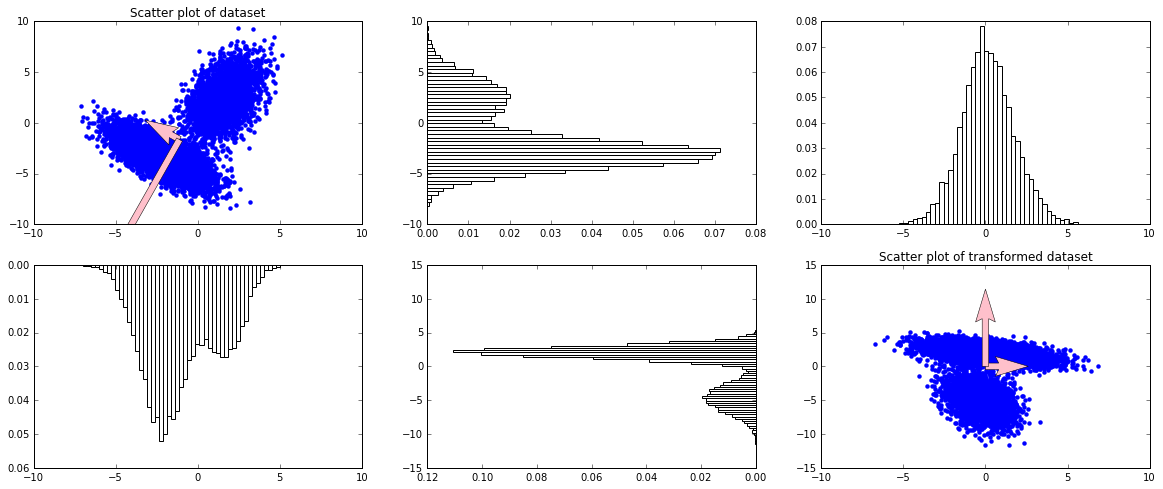

In [141]:
#%%time
fig = plt.figure()

ax = fig.add_subplot(231)
plt.scatter(*D,linewidths=0,alpha=1) # alpha is the transparency of the dots
plt.ylim(-10,10)
plt.xlim(-10,10)
plt.title('Scatter plot of dataset')
scaled_eigenvectors_ = np.c_[np.c_[mu,mu].T,np.c_[U[:,0]*lamda[0],U[:,1]*lamda[1]].T]
ax.quiver(*zip(*scaled_eigenvectors_),color='pink',angles='uv',scale_units='xy',scale=1, width=.02, linewidth=.5);

fig.add_subplot(232)
plt.barh(x2,z2,bar_width2,color='white')
plt.ylim(-10,10)

fig.add_subplot(233)
plt.bar(x1_,z1_,bar_width_,color='white')
plt.xlim(-10,10)

ax = fig.add_subplot(234)
plt.bar(x1,z1,bar_width,color='white')
plt.xlim(-10,10)
ax.invert_yaxis()

ax = fig.add_subplot(235)
plt.barh(x2_,z2_,bar_width2_,color='white')
plt.ylim(-15,15)
ax.invert_xaxis()

ax = fig.add_subplot(236)
plt.scatter(*D_,linewidths=0,alpha=1) # alpha is the transparency of the dots
plt.ylim(-15,15)
plt.xlim(-10,10)
plt.title('Scatter plot of transformed dataset')
scaled_eigenvectors_ = np.c_[np.c_[mu_,mu_].T,np.c_[U_[:,0]*lamda_[0],U_[:,1]*lamda_[1]].T]
ax.quiver(*zip(*scaled_eigenvectors_),color='pink',angles='uv',scale_units='xy',scale=1, width=.02, linewidth=.5);

In [165]:
mu1=3*np.array([2, 3]) # true mean value
Sigma1=np.array([1,  .2,  .2, 1]).reshape(2,2)   # true covariance matrix

mu2=-2.5*np.array([2, 3]) #true mean value
Sigma2=np.array([1, -.3, -.3, 1  ]).reshape(2,2)   # true covariance matrix

p1 = 0.3          # P(C1)  probabilty of class 1
p2 = 1-p1

N=10000            # number of points in density

D1 = np.random.multivariate_normal(mu1, Sigma1, N)
D1 = D1.T

D2 = np.random.multivariate_normal(mu2, Sigma2, N)
D2 = D2.T

c1 = np.random.binomial(n = 1, p = p1,size = N)
c2 = 1 - c1
D = D1*c1+D2*c2

mu = D.mean(1)
Sigma = np.cov(D)
print('Estimated mean is:\n',mu)
print('\nEstimated covariance matrix is:\n',Sigma)

lamda, U = np.linalg.eig(Sigma)

# Coordinate transformation
D_ = np.dot(U.T,D-mu[:,None])
mu_ = D_.mean(1)
Sigma_ = np.cov(D_)
Sigma_[np.abs(Sigma_) < 100*10**-16] = 0 # correction for rounding errors
lamda_, U_ = np.linalg.eig(Sigma_)

nbins = 50
z1,x1= np.histogram(D[0,:],nbins)
z2,x2= np.histogram(D[1,:],nbins)
z1_,x1_= np.histogram(D_[0,:],nbins)
z2_,x2_= np.histogram(D_[1,:],nbins)
z1 = z1/z1.sum()
z2 = z2/z2.sum()
z1_ = z1_/z1_.sum()
z2_ = z2_/z2_.sum()

# calculate mid-points of bars
x1 = np.convolve(x1, np.ones(2,)/2, 'valid')
x2 = np.convolve(x2, np.ones(2,)/2, 'valid')
x1_ = np.convolve(x1_, np.ones(2,)/2, 'valid')
x2_ = np.convolve(x2_, np.ones(2,)/2, 'valid')

bar_width = np.diff(x1)[0]
bar_width_ = np.diff(x1_)[0]
bar_width2 = np.diff(x2)[0]
bar_width2_ = np.diff(x2_)[0]


Estimated mean is:
 [-1.72756787 -2.56923935]

Estimated covariance matrix is:
 [[ 26.42811069  37.96127693]
 [ 37.96127693  58.09147055]]


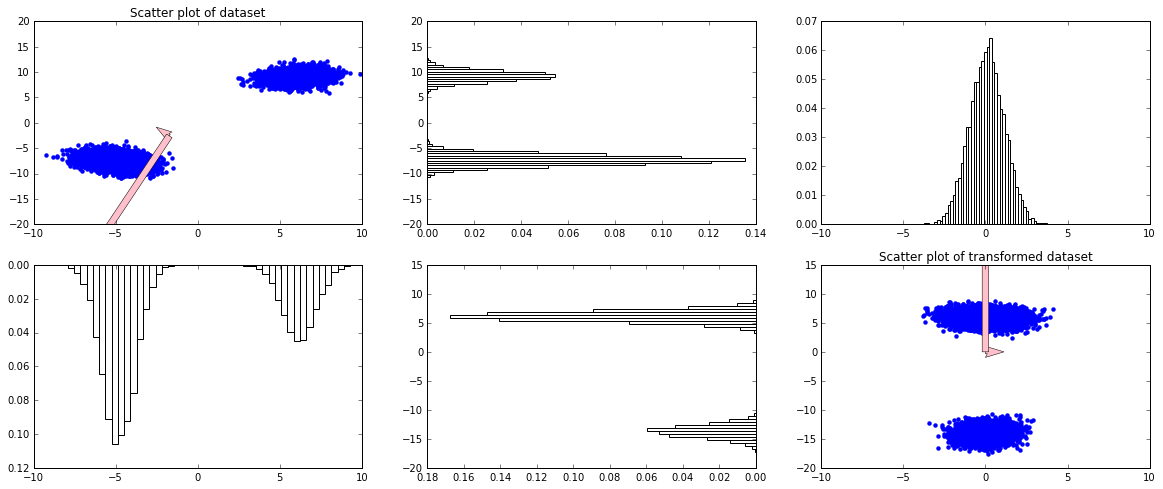

In [169]:

#%%time
fig = plt.figure()

ax = fig.add_subplot(231)
plt.scatter(*D,linewidths=0,alpha=1) # alpha is the transparency of the dots
plt.ylim(-20,20)
plt.xlim(-10,10)
plt.title('Scatter plot of dataset')
scaled_eigenvectors_ = np.c_[np.c_[mu,mu].T,np.c_[U[:,0]*lamda[0],U[:,1]*lamda[1]].T]
ax.quiver(*zip(*scaled_eigenvectors_),color='pink',angles='uv',scale_units='xy',scale=1, width=.02, linewidth=.5);

fig.add_subplot(232)
plt.barh(x2,z2,bar_width2,color='white')
plt.ylim(-20,20)

fig.add_subplot(233)
plt.bar(x1_,z1_,bar_width_,color='white')
plt.xlim(-10,10)

ax = fig.add_subplot(234)
plt.bar(x1,z1,bar_width,color='white')
plt.xlim(-10,10)
ax.invert_yaxis()

ax = fig.add_subplot(235)
plt.barh(x2_,z2_,bar_width2_,color='white')
plt.ylim(-20,15)
ax.invert_xaxis()

ax = fig.add_subplot(236)
plt.scatter(*D_,linewidths=0,alpha=1) # alpha is the transparency of the dots
plt.ylim(-20,15)
plt.xlim(-10,10)
plt.title('Scatter plot of transformed dataset')
scaled_eigenvectors_ = np.c_[np.c_[mu_,mu_].T,np.c_[U_[:,0]*lamda_[0],U_[:,1]*lamda_[1]].T]
ax.quiver(*zip(*scaled_eigenvectors_),color='pink',angles='uv',scale_units='xy',scale=1, width=.02, linewidth=.5);